In [27]:
import os
import pandas as pd
import math

# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/'
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

In [28]:
df_ave_data = pd.DataFrame()

path_pr = "".join([dir_path, "jaccard.csv"])
# read text file into pandas DataFrame
df_ave_data = pd.read_csv(path_pr, header=0, delim_whitespace=True)


### set the 'topic' column as index
df_ave_data.columns = ['topic','0', '1', '2', '3', '4','5']
df_ave_data.set_index('topic', inplace=True)
##df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)
#
df_ave_data = df_ave_data.drop(['0'], axis=1)
#
df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'moeir_jaccard_evaluation_by_run_last_gen.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.716792,0.451539,0.515263,0.682340,0.696867,0.694483,0.400034,0.547069,0.604811,0.452945,...,0.713333,0.770451,0.770684,0.675474,0.556786,0.565720,0.582713,0.662152,0.649623,0.981439
2,0.725105,0.472391,0.684421,0.719622,0.760049,0.421985,0.546938,0.719089,0.759868,0.461988,...,0.667003,0.851313,0.576322,0.714109,0.786904,0.610715,0.391244,0.776274,0.717878,0.483394
3,0.768462,0.687732,0.409085,0.778316,0.421250,0.603232,0.494834,0.535682,0.455416,0.384381,...,0.817258,0.447445,0.310261,0.665765,0.482407,0.345798,0.731086,0.385688,0.493941,0.818407
4,0.543084,0.382633,0.398118,0.678298,0.576844,0.743356,0.416090,0.634138,0.588666,0.542908,...,0.476694,0.783884,0.853061,0.593719,0.976922,0.373277,0.831486,0.428270,0.647935,0.869565
5,0.706600,0.458339,0.420877,0.845953,0.839022,0.691551,0.485232,0.711114,0.669258,0.518291,...,0.609495,0.859257,0.636391,0.576081,0.708764,0.516571,0.631172,0.940093,0.519018,0.570708


In [29]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.692009,0.490527,0.485553,0.740906,0.658806,0.630921,0.468626,0.629418,0.615604,0.472103,...,0.656757,0.742470,0.629344,0.645030,0.702357,0.482416,0.633540,0.638495,0.605679,0.744703
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.086525,0.115560,0.120527,0.071129,0.163804,0.127258,0.060333,0.087042,0.112019,0.061869,...,0.126217,0.169576,0.208986,0.058128,0.195028,0.117412,0.165827,0.233779,0.095264,0.209537


In [30]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.692009,5.0,0.086525
134,0.490527,5.0,0.115560
187,0.485553,5.0,0.120527
215,0.740906,5.0,0.071129
221,0.658806,5.0,0.163804
25,0.630921,5.0,0.127258
259,0.468626,5.0,0.060333
289,0.629418,5.0,0.087042
350,0.615604,5.0,0.112019
363,0.472103,5.0,0.061869


In [31]:
stats_all_topics['mean'].describe().transpose()


t = pd.DataFrame({  'mean_js': [stats_all_topics['mean'].mean()],                    
                    'count_js': [stats_all_topics['mean'].count()],
                    'std_js': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_js'] = ci95_lo
t['ci95_hi_js'] = ci95_hi


t.to_csv(save_path + 'moeir_jaccard_evaluation_stats_last_gen.csv')
t

,mean_js,count_js,std_js,ci95_lo_js,ci95_hi_js
0,0.622174,25,0.105523,0.580809,0.663539


Text(0.5, 0.98, 'Jaccard  - MOEIR ')

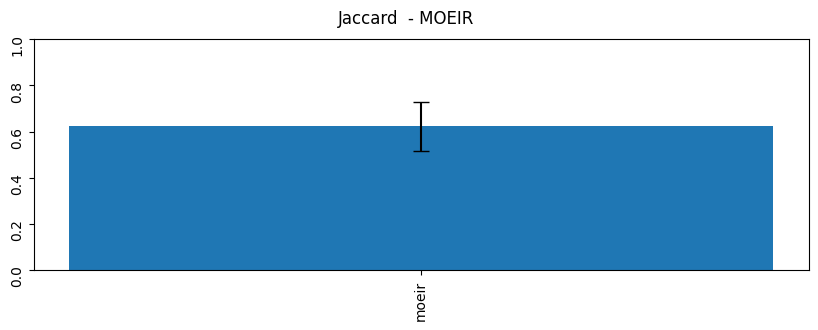

In [32]:
######### JACCARD
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('moeir', t['mean_js'], yerr=t['std_js'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('Jaccard  - MOEIR ')